In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import logging
# from imp import reload
from datetime import datetime, timedelta
# import sys
# sys.path.append("../")

from kats.consts import TimeSeriesData
# reload(logging)
from hydrophone_data_processing import load, useful_variables, plotting
import obspy

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
chan = 'GHZ'
#statlist = [ 'A01' ,'A03' , 'A05' , 'A07' , 'A09' , 'A11' , 'A13' , 'A15' , 'A17' , 'A19' ]
#statlist = [ 'A01' ,'A02' , 'A03' , 'A04' , 'A05' , 'A06' , 'A07' , 'A08' , 'A09', 'A10' , 'A11', 'A13', 'A14', 'A19']#, 'A16', 'A17', 'A18', 'A19' ]
statlist = [ 'B01' ,'B02' , 'B03' , 'B04' , 'B06' , 'B07' , 'B08' , 'B09','B10' , 'B11', 'B12', 'B13' , 'B19' , 'B20']#,'B14','B15','B16','B17','B18','B19', 'B20' ]

#statlist = ['A04']
day = 15
hr = 13
start_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+hr*3600
end_time = obspy.UTCDateTime('2020-1-' + str(day) + 'T00:00:00')+(hr+1)*3600
stream = obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" +statlist[0]+ "/*.." + chan +".2020.0" +str(day))

In [15]:
start_time

2020-01-15T13:00:00.000000Z

In [4]:
for s in statlist[1:]:
    
    stream += obspy.read("/media/sbrent/Oman3/PASSCAL/Main_deployment/DAYS/" + s + "/*.." + chan + ".2020.0" + str(day))


In [5]:
data = stream.trim(starttime=start_time,endtime=end_time) #look into trim()

In [6]:
len(data)

14

In [7]:
from kats.detectors.bocpd import BOCPDetector, BOCPDModelType, TrendChangeParameters

In [8]:
from kats.consts import TimeSeriesData

In [9]:
data = data[2].copy()
data.data = data.data**2
data.decimate(factor=10)
data.decimate(factor=10)
h2 = TimeSeriesData(pd.DataFrame({'time':data.times(type='timestamp')*1e9
                            , 'value':data.data}))

In [10]:
detector = BOCPDetector(h2)

In [11]:
changepoints = detector.detector(
    model=BOCPDModelType.NORMAL_KNOWN_MODEL # this is the default choice
)


/home/sbrent/research/Oman/venv/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "known_prec_multiplier". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.

/home/sbrent/research/Oman/venv/lib/python3.8/site-packages/ax/core/parameter.py:467: UserWarning:

`sort_values` is not specified for `ChoiceParameter` "cp_prior". Defaulting to `True` for parameters of `ParameterType` FLOAT. To override this behavior (or avoid this warning), specify `sort_values` during `ChoiceParameter` construction.



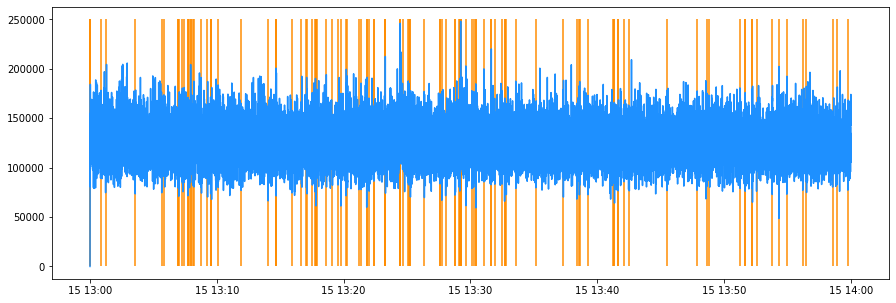

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.vlines([c.start_time for c in changepoints], -1, 250000, color='darkorange')
ax.plot(h2.time, h2.value, color='dodgerblue')
